In [306]:
from glossary_eval import get_sr2terms
from scipy.stats import ttest_ind
import matplotlib.pyplot as plt
import os
import csv
from collections import defaultdict, Counter
import tqdm
import numpy as np
import matplotlib as mpl
from scipy.stats import mannwhitneyu
mpl.rcParams['figure.dpi'] = 300

In [307]:
ROOT = '/data0/lucy/ingroup_lang/'
LOG_DIR = ROOT + 'logs/' 
SENSE_PMI_DIR = LOG_DIR + 'finetuned_sense_pmi/'
BASE_SENSE_PMI_DIR = LOG_DIR + 'base_sense_pmi/'
DN_SENSE_PMI_DIR = LOG_DIR + 'denoised_sense_pmi/'
TYPE_PMI_DIR = LOG_DIR + 'pmi/'
TFIDF_DIR = LOG_DIR + 'tfidf/'

## Finetuned Sense PMI

In [308]:
sr2terms = get_sr2terms()

In [309]:
gloss_vals = []
not_gloss_vals = []
for filename in tqdm.tqdm(sorted(os.listdir(SENSE_PMI_DIR))): 
    subreddit = filename.replace('.csv', '')
    if subreddit not in sr2terms: continue
    gloss_terms = set(sr2terms[subreddit])
    with open(SENSE_PMI_DIR + filename, 'r') as infile: 
        w2score = defaultdict(list)
        reader = csv.DictReader(infile)
        for row in reader: 
            w = row['sense'].split('#####')[0]
            score = float(row['pmi'])
            w2score[w].append(score)
        for w in w2score: 
            if w in gloss_terms: 
                gloss_vals.append(max(w2score[w]))
            else: 
                not_gloss_vals.append(max(w2score[w]))

100%|██████████| 474/474 [00:04<00:00, 108.17it/s]


In [311]:
print(len(gloss_vals))
print(len(not_gloss_vals))

797
194995


In [203]:
print(ttest_ind(gloss_vals, not_gloss_vals))
print(mannwhitneyu(gloss_vals, not_gloss_vals, alternative='greater'))

Ttest_indResult(statistic=52.33533818498425, pvalue=0.0)
MannwhitneyuResult(statistic=122073681.5, pvalue=3.7826169393568593e-171)


Text(0.5, 0, 'max sense pmi')

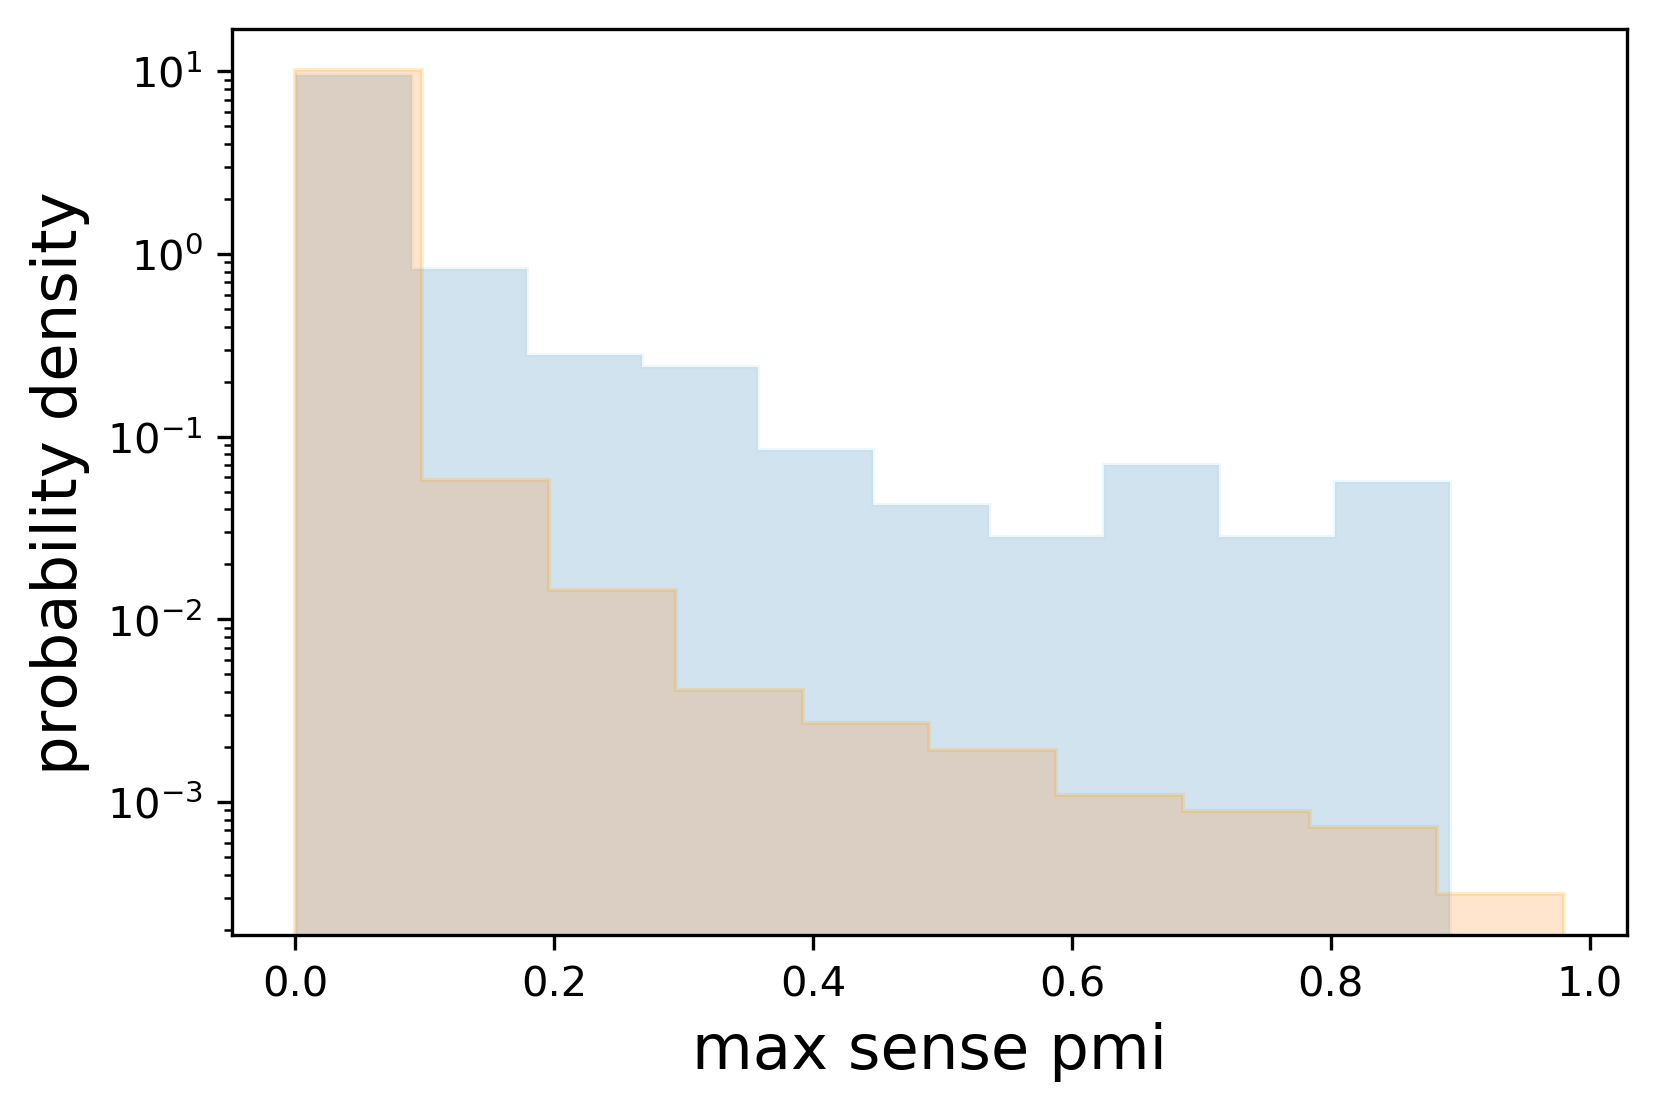

In [204]:
plt.hist(gloss_vals, label="glossary", alpha=0.2, density=True, edgecolor='lightblue', histtype= "stepfilled")
plt.hist(not_gloss_vals, label="non-glossary", alpha=0.2, density=True, edgecolor='orange', histtype= "stepfilled")
plt.yscale('log')
plt.ylabel('probability density', fontsize=15)
plt.xlabel('max sense pmi', fontsize=15)

In [205]:
print(np.median(gloss_vals))
print(np.median(not_gloss_vals))

0.018778518778518778
0.004139887672977824


In [206]:
gloss_vals = []
not_gloss_vals = []
for filename in tqdm.tqdm(sorted(os.listdir(SENSE_PMI_DIR))): 
    subreddit = filename.replace('.csv', '')
    if subreddit not in sr2terms: continue
    gloss_terms = set(sr2terms[subreddit])
    with open(SENSE_PMI_DIR + filename, 'r') as infile: 
        w2score = defaultdict(list)
        reader = csv.DictReader(infile)
        for row in reader: 
            w = row['sense'].split('#####')[0]
            score = float(row['pmi'])
            w2score[w].append(score)
        for w in w2score: 
            score = max(w2score[w])
            if w in gloss_terms and score < 0.01:
                print(subreddit, w, score)
            elif w not in gloss_terms and score > 0.2: 
                print(subreddit, w, score)

  2%|▏         | 10/474 [00:00<00:04, 95.31it/s]

afl sydney 0.24358974358974358
afl saints 0.23925233644859814
afl ground 0.009714851128901683
afl rounds 0.0063931013975617006
afl list 0.005934528747367749
afl behind 0.0036072144288577155
afl back 0.0033682476665118045


  3%|▎         | 13/474 [00:00<00:09, 46.17it/s]

airforce supervisor 0.32830820770519265
airforce af 0.2336120852441327
airforce force 0.20237388724035607
airforce asap 0.006096859542160359
airforce fyi 0.002385685884691849


  3%|▎         | 16/474 [00:00<00:13, 33.63it/s]

amitheasshole ta 0.732
amitheasshole asshole 0.2546174142480211
antimlm

  4%|▍         | 20/474 [00:00<00:14, 30.83it/s]

 kay 0.7555555555555555
antimlm schemes 0.5189873417721519
antimlm scheme 0.4762484774665043
antimlm pyramid 0.406371911573472
antimlm oils 0.28707865168539326
antimlm babe 0.2619589977220957
antimlm vector 0.2088167053364269
aquariums

  6%|▌         | 28/474 [00:00<00:14, 30.62it/s]

 parameters 0.9797979797979798
aquariums shrimp 0.6093189964157706
aquariums fin 0.502283105022831
aquariums gallon 0.4683048433048433
aquariums snail 0.4679245283018868
aquariums gal 0.43700787401574803
aquariums planted 0.4096662830840046
aquariums goldfish 0.3472322070452912
aquariums rot 0.3408360128617363
aquariums sponge 0.29205607476635514
aquariums pea 0.2857142857142857
aquariums strips 0.2801556420233463
aquariums tank 0.2798362774666092
aquariums pond 0.2345415778251599
aquariums stocking 0.2244467860906217
aquariums filter 0.21022727272727273
aquariums neon 0.20893561103810776
aquariums ram 0.00922207347910159
aquariums micro 0.008774583963691377
aquariums macro 0.008120649651972157
aquariums aka 0.003947979563399907
aquariums l 0.0031060094530722484
aquariums til 0.002464709836432893
aquariums imo 0.0016625806633415053
aquariums tbh 0.0015603186334893651
askgaybros bottoms 0.2163978494623656
askgaybros top 0.008737123235406333
askgaybros bear 0.008137814415556964


  7%|▋         | 35/474 [00:00<00:12, 36.29it/s]

asoiaf paramount 0.5196850393700787
asoiaf islands 0.31363088057901084
asoiaf prophecy 0.30448717948717946
asoiaf bran 0.3033579965850882
asoiaf landing 0.28543472183393903
asoiaf ned 0.2711804324707551
asoiaf throne 0.263658940397351
asoiaf rebellion 0.2617924528301887
asoiaf worm 0.2557856272838002
asoiaf succession 0.2536873156342183
asoiaf queen 0.24847396768402155
asoiaf kings 0.24166666666666667
asoiaf ruler 0.231055900621118
asoiaf jon 0.22590620168355952
asoiaf heir 0.22362869198312235
asoiaf stark 0.21714818266542404
asoiaf hound 0.21497120921305182
asoiaf rightful 0.2148876404494382
asoiaf king 0.2067372996468351
asoiaf fleet 0.205078125
asoiaf eyed 0.2025931928687196
asoiaf runners 0.20130932896890344
asoiaf raven 0.20105820105820105
asoiaf got 0.007172438902289173
asoiaf iirc 0.007152145643693108
asoiaf imo 0.005833121988333756
asoiaf aa 0.005647058823529412
asoiaf so 0.004065221551236922
asoiaf subreddit 0.00314019990378962
asoiaf til 0.003136903428187318
asoiaf irl 0.0028

 11%|█         | 53/474 [00:01<00:09, 45.44it/s]

 atheist 0.27313167259786475
atheism temple 0.21495327102803738
bigbrother feeds 0.8602739726027397
bigbrother cliff 0.6271186440677966
bigbrother holly 0.5198675496688742
bigbrother jackson 0.4696813977389517
bigbrother tommy 0.2204155374887082
bigbrother brother 0.21178738639493253
bigbrother bob 0.004758418740849195
bigbrother de 0.0019500780031201249


 14%|█▍        | 68/474 [00:01<00:07, 54.66it/s]

bodybuilding babe 0.3020833333333333
bodybuilding heath 0.26865671641791045
bodybuilding posing 0.21683673469387754
bodybuilding lifts 0.20142857142857143
bodybuilding set 0.0037072436064529207
boxoffice avatar 0.4731610337972167
boxoffice titanic 0.4433198380566802
boxoffice office 0.3488224061107575
boxoffice phoenix 0.3041509433962264
boxoffice worldwide 0.29278887923544744
boxoffice theaters 0.2710526315789474
boxoffice audiences 0.24854368932038834
boxoffice jurassic 0.24709302325581395
boxoffice paramount 0.24489795918367346
boxoffice bo 0.21747967479674796
boxoffice lion 0.20105820105820105
boxoffice foreign 0.008282526170481997
boxoffice br 0.006454484754061874
boxoffice pr 0.005639097744360902
boxoffice row 0.004022988505747126
boxoffice bot 0.003629309805393905
boxoffice am 0.001834068183318783
boxoffice for 0.0013707229843956646
boxoffice pro 0.0012205044751830757
cars si 0.49583333333333335
cars enthusiasts 0.46124031007751937
cars civic 0.4185082872928177
cars accord 0.391

 17%|█▋        | 82/474 [00:01<00:06, 62.99it/s]

cats kitty 0.4581917063222298
cats kittens 0.33712512926577043
cats kitten 0.3201754385964912
cats adopting 0.2868217054263566
cats sweetie 0.2809364548494983
cats vet 0.27134609541172894
cats meow 0.2602739726027397
cats cats 0.21992558908639934
cats cat 0.20523757563733758
cats rubs 0.2011173184357542
cats colony 0.006788511749347258
cats blue 0.005352475001037301
cats queen 0.0038734195717313453
cats catch 0.0030121969285467386
cats tom 0.0018739352640545145
cats quick 0.0017014270032930845
cats release 0.0012500504052582765
cats smoke 0.0010268050151318634
childfree tubes 0.24170616113744076
childfree accident 0.009363295880149813
childfree sink 0.008452774715178243
childfree spawn 0.008226595855461835
childfree so 0.004575934792539434
childfree trap 0.004180820486020381
childfree re 0.0036258589124800876


 19%|█▉        | 91/474 [00:01<00:07, 49.04it/s]

christianity nt 0.39864864864864863
christianity matthew 0.3765586034912718
christianity genesis 0.3149492017416546
christianity spirit 0.31257557436517536
christianity creed 0.2875816993464052
christianity sins 0.2782719186785261
christianity sin 0.27450980392156865
christianity gospel 0.2718052738336714
christianity thy 0.26732673267326734
christianity unto 0.25510204081632654
christianity fathers 0.25205479452054796
christianity supper 0.23655913978494625
christianity testament 0.22375
christianity grace 0.2185089974293059
christianity verse 0.20654761904761904
christianity teaches 0.2041062801932367
christianity conservative 0.0096579476861167
christianity tolerance 0.00840630472854641
christianity christmas 0.003627318893149549
churning ink 0.8439897698209718
churning aspire 0.6462765957446809
churning chase 0.5634033269702754
churning premier 0.36351706036745407
churning mileage 0.3611111111111111
churning arrival 0.3480861244019139
churning fee 0.32755298651252407
churning alask

 21%|██        | 98/474 [00:01<00:10, 36.91it/s]

salty 0.007942238267148015
clashroyale league 0.007258540126117135
clashroyale fb 0.006704980842911878
clashroyale toxic 0.005841121495327103
clashroyale op 0.005786596010527528
clashroyale id 0.005783648696893967
clashroyale cc 0.0031007751937984496
clashroyale control 0.003086507959189506
clashroyale pull 0.0026919711959082038
clashroyale it 0.0017742229884299594
clashroyale leg 0.0017129153819801302
competitiveoverwatch goats 0.8306122448979592
competitiveoverwatch owl 0.7139344262295082
competitiveoverwatch runaway 0.2682926829268293
competitiveoverwatch va 0.24719101123595505
competitiveoverwatch widow 0.24588235294117647
competitiveoverwatch ow 0.24146981627296588
competitiveoverwatch hybrid 0.009066405292820387
competitiveoverwatch pick 0.008919476260279759
competitiveoverwatch cc 0.007296733842946491
competitiveoverwatch support 0.007284016052093586
competitiveoverwatch spam 0.0063766244248930504
competitiveoverwatch engage 0.00477326968973747
competitiveoverwatch tracking 0.00

 26%|██▌       | 121/474 [00:02<00:07, 45.37it/s]

cricket overs 0.8881036513545347
cricket bowling 0.7838660578386606
cricket cricket 0.5764944275582573
cricket toss 0.3034825870646766
cricket aus 0.28027681660899656
cricket england 0.27482823235477827
cricket wi 0.26497695852534564
cricket ali 0.227765726681128
cricket nz 0.21835883171070933
cricket goat 0.007487131492746842
datingoverthirty unavailable 0.2689393939393939
datingoverthirty dates 0.24106463878326997
datingoverthirty hinge 0.2234375
datingoverthirty old 0.007284198451390881
datingoverthirty af 0.0034279592929833957
datingoverthirty so 0.0027056975403963314


 28%|██▊       | 135/474 [00:02<00:07, 45.93it/s]

deadbydaylight radius 0.6957403651115619
deadbydaylight killers 0.5890061885693484
deadbydaylight survivors 0.5804640718562875
deadbydaylight survivor 0.5380039656311963
deadbydaylight killer 0.46365612170973197
deadbydaylight hatch 0.44343575418994413
deadbydaylight entity 0.36447811447811446
deadbydaylight daylight 0.36379928315412186
deadbydaylight ons 0.2822695035460993
deadbydaylight hook 0.27224435590969454
deadbydaylight escapes 0.2578947368421053
deadbydaylight weasel 0.2524271844660194
deadbydaylight adrenaline 0.25067385444743934
deadbydaylight nurse 0.21949795680093404
deadbydaylight exhaustion 0.21813403416557162
deadbydaylight perk 0.2157930565010211
deadbydaylight hooks 0.21496062992125983
deadbydaylight slug 0.20685959271168275
deadbydaylight whispers 0.20631970260223048
deadbydaylight stalk 0.20441988950276244
deadbydaylight generator 0.20337552742616033
deadbydaylight legacy 0.0078125
deadbydaylight bs 0.0066792258948450076
deadbydaylight is 0.0017963251566339366
dnd e

 31%|███       | 147/474 [00:02<00:06, 47.14it/s]

dota2 ti 0.8692660550458715
dota2 nip 0.3786635404454865
dota2 eg 0.26912828321279025
dota2 bracket 0.2597114317425083
dota2 ee 0.22163588390501318
dota2 vi 0.2007042253521127
dota2 top 0.006982067913010302
dota2 bot 0.00675802515487141
dota2 ss 0.005378409527468306
dota2 push 0.005248860444771858
dota2 miss 0.0035299861053738404
dota2 p 0.002349506959524403
dota2 back 0.0022134172143493352
dota2 b 0.002208403556692044
elderscrollsonline elf 0.23030303030303031
elderscrollsonline dc 0.009865470852017937
elderscrollsonline k 0.008445106805762544
elderscrollsonline raid 0.00833750208437552
elderscrollsonline spawn 0.008122461730709154
elderscrollsonline cc 0.008078526754690757
elderscrollsonline troll 0.007686849574266793
elderscrollsonline roll 0.006084656084656085
elderscrollsonline junk 0.005478297513695744
elderscrollsonline ad 0.005283317923656056
elderscrollsonline jumping 0.005245901639344262
elderscrollsonline pm 0.005194459243473628
elderscrollsonline drink 0.004705636306598347


 34%|███▍      | 161/474 [00:02<00:06, 51.58it/s]

 essays 0.5203252032520326
exmormon ward 0.5164628410159925
exmormon brethren 0.46938775510204084
exmormon saints 0.44086021505376344
exmormon smith 0.38908327501749473
exmormon joseph 0.3558523173605656
exmormon utah 0.26298342541436465
exmormon temple 0.2593984962406015
exmormon prophet 0.2479253112033195
exmormon church 0.20408947651625797
exmormon pm 0.004262120404901438
exmormon dr 0.00398505603985056
exmormon wow 0.0037593984962406013
exmormon fair 0.00313861900763664
exmormon dm 0.0031224545207711105
exmormon by 0.002986238899111929
exmormon til 0.0022723583833793217
exmormon imo 0.0018316566630033533
fashionreps chart 0.504258943781942
fashionreps haul 0.4427736006683375
fashionreps tee 0.41320432555492315
fashionreps flaw 0.3470899470899471
fashionreps warehouse 0.2810880829015544
fashionreps rl 0.2655190401669275
fashionreps oversized 0.25061425061425063
fashionreps hoodie 0.24761113419194017
fashionreps batch 0.2371699053313403
fashionreps liner 0.225531914893617
fashionreps

 35%|███▌      | 167/474 [00:03<00:07, 39.53it/s]

 cues 0.47096774193548385
fatlogic rave 0.37532133676092544
fatlogic obese 0.25311601150527324
fatlogic epidemic 0.20846905537459284
fifa rated 0.6293577981651376
fifa cam 0.5686274509803921
fifa packed 0.3137946231820185
fifa cm 0.25133057362507394
fifa flashback 0.2075
fifa rivals 0.2066458982346833
fifa op 0.004359885508697617
fifa hero 0.003098373353989156
fifa if 0.0021037488404070464
fireemblemheroes refine 0.9441340782122905
fireemblemheroes disrupt 0.803680981595092
fireemblemheroes spiral 0.729381443298969
fireemblemheroes ploy 0.7057220708446866
fireemblemheroes hone 0.4823943661971831
fireemblemheroes roy 0.43169398907103823
fireemblemheroes feathers 0.35172413793103446
fireemblemheroes desperation 0.3384146341463415
fireemblemheroes fodder 0.2654176424668228
fireemblemheroes sturdy 0.24191461836998707
fireemblemheroes por 0.2147239263803681
fireemblemheroes banner 0.21391752577319587
fireemblemheroes picnic 0.21316165951359084
fireemblemheroes null 0.21248339973439576
firee

 36%|███▋      | 172/474 [00:03<00:09, 32.00it/s]

fitness rows 0.6348547717842323
fitness lifts 0.5742857142857143
fitness squat 0.5564598168870803
fitness curl 0.5294117647058824
fitness raises 0.52894438138479
fitness rack 0.48125
fitness extensions 0.444743935309973
fitness presses 0.4362244897959184
fitness reps 0.4333706606942889
fitness dips 0.3965303593556382
fitness exercises 0.38492063492063494
fitness surplus 0.3638095238095238
fitness lifting 0.3242424242424242
fitness weights 0.31
fitness workout 0.27140115163147793
fitness bulk 0.24550526968381897
fitness deficit 0.241674595623216
fitness elbows 0.2305084745762712
fitness ups 0.22852081488042517
fitness muscle 0.2264524647887324
fitness protein 0.20891029500301023
fitness accessory 0.2077922077922078
fitness gym 0.2016361886429259
fitness bb 0.008114488049572145
fitness if 0.003931896626736665
future_fight panther 0.9566563467492261
future_fight rogers 0.9246376811594202
future_fight advancement 0.8786127167630058
future_fight jean 0.5955056179775281
future_fight gene 0.5

 41%|████      | 192/474 [00:03<00:07, 36.19it/s]

 worm 0.24543239951278928
gameofthrones queen 0.24272890484739676
gameofthrones landing 0.23224233983286907
gameofthrones bran 0.22896213183730715
gameofthrones heir 0.22784810126582278
gameofthrones raven 0.22645502645502646
gameofthrones kings 0.22324561403508772
gameofthrones hound 0.22168905950095968
gameofthrones throne 0.21647350993377484
gameofthrones king 0.21529475685954905
gameofthrones eyed 0.2106969205834684
gameofthrones got 0.007139064609596626
gamingcirclejerk diversity 0.3278301886792453
gamingcirclejerk consoles 0.009823182711198428
gamingcirclejerk microsoft 0.008088132756937665
gamingcirclejerk females 0.006906474820143885
gamingcirclejerk objectively 0.0068271233510761396


 42%|████▏     | 197/474 [00:04<00:10, 26.13it/s]

gendercritical gaze 0.23492063492063492
gendercritical sjw 0.008111239860950173
godzilla destroyer 0.8426150121065376
godzilla godzilla 0.5898247322297955
godzilla atomic 0.49577464788732395
godzilla kong 0.4317389927146025
godzilla rim 0.3789308176100629
godzilla critics 0.2530755711775044
godzilla oxygen 0.21482602118003025


 51%|█████     | 242/474 [00:04<00:05, 44.66it/s]

hearthstone priest 0.23384085033036484
hearthstone rogue 0.22534794196031982
hearthstone face 0.008245759483743753
hearthstone tech 0.008084661852205114
hearthstone owl 0.007659167065581618
hearthstone alex 0.0075440067057837385
hearthstone tap 0.007009345794392523
hearthstone set 0.006647521195409663
hearthstone emperor 0.006317119393556538
hearthstone block 0.006128255635806522
hearthstone circle 0.006080707573244887
hearthstone vanilla 0.005869200670765791
hearthstone ping 0.00570801317233809
hearthstone cycle 0.005483295077786279
hearthstone egg 0.005291005291005291
hearthstone lore 0.0052134704804847115
hearthstone monkey 0.004353233830845771
hearthstone reach 0.004311996933691069
hearthstone burn 0.004120148856990962
hearthstone death 0.003759331516026155
hearthstone pain 0.003184466019417476
hearthstone hat 0.00313782283369539
hearthstone out 0.0019950784232556002
hearthstone de 0.0019500780031201249
hearthstone race 0.0007387083157450401
justnomil monkeys 0.2977667493796526
jus

 53%|█████▎    | 252/474 [00:04<00:05, 43.19it/s]

 hee 0.7851239669421488
kpop chorus 0.38181818181818183
kpop idle 0.3548387096774194
kpop sm 0.3380952380952381
kpop luv 0.26260504201680673
kpop g 0.25925925925925924
kpop bop 0.252760736196319
kpop idol 0.2244242099625067
kpop korea 0.20966595593461265
leagueoflegends tl 0.5184754146057609
leagueoflegends riot 0.4219047619047619
leagueoflegends worlds 0.391025641025641
leagueoflegends sa 0.27314814814814814
leagueoflegends champ 0.26390064916737227
leagueoflegends dl 0.23407917383820998
leagueoflegends ig 0.2201744281717953
leagueoflegends graves 0.20037105751391465
leagueoflegends er 0.005191944619257395
leagueoflegends or 0.003305083403775924
me_irl travel 

 61%|██████    | 289/474 [00:04<00:02, 66.86it/s]

0.004815409309791332
motorcycles rider 0.7156488549618321
motorcycles filtering 0.6621004566210046
motorcycles riders 0.5514705882352942
motorcycles splitting 0.5032341526520052
motorcycles ridden 0.4552683896620278
motorcycles bikes 0.4356973193077706
motorcycles injected 0.4230769230769231
motorcycles bike 0.36413812623832437
motorcycles motorcycle 0.33474833232261975
motorcycles throttle 0.3309557774607703
motorcycles tire 0.3075880758807588
motorcycles lever 0.28909090909090907
motorcycles clutch 0.28666371289322107
motorcycles rode 0.28193430656934304
motorcycles rash 0.2535211267605634
motorcycles honda 0.23333333333333334
motorcycles rev 0.22151898734177214
motorcycles cooled 0.20363636363636364
motorcycles standard 0.0058466211085801065
pathofexile

 72%|███████▏  | 342/474 [00:05<00:01, 93.05it/s]

 poe 0.7075358851674641
pathofexile inc 0.6211180124223602
pathofexile agony 0.5909090909090909
pathofexile delve 0.49933333333333335
pathofexile leagues 0.41862955032119914
pathofexile betrayal 0.3648928818244644
pathofexile increased 0.3548136645962733
pathofexile frenzy 0.27892918825561314
pathofexile effectiveness 0.24324324324324326
pathofexile legion 0.2190704032809296
pokemontrades requesting 0.7210884353741497
pokemontrades requested 0.7086614173228346
pokemontrades obtained 0.624
pokemontrades jolly 0.602803738317757
pokemontrades breed 0.4986979166666667
pokemontrades adamant 0.4819672131147541
pokemontrades lure 0.47058823529411764
pokemontrades deposit 0.35030549898167007
pokemontrades modest 0.2840466926070039
pokemontrades premier 0.20833333333333334
pokemontrades competitive 0.009225398936170214
pokemontrades event 0.007982893799002138
pokemontrades perfect 0.006728507969689051
pokemontrades em 0.006637322713616991
pokemontrades spread 0.0040742772075530835
pokemontrades

 76%|███████▌  | 358/474 [00:05<00:01, 76.76it/s]

purplepilldebate imperative 0.43333333333333335
purplepilldebate cc 0.00771887060735324
purplepilldebate so 0.0012682957220607803
rainbow6 operator 0.2890625
rainbow6 hostage 0.28440366972477066
rainbow6 siege 0.24074074074074073
rainbow6 mirror 0.00955033824114604
rainbow6 meta 0.006498329001113999
rainbow6 bb 0.006491590439657716
rainbow6 peak 0.0055629459426774705
rainbow6 oh 0.0027066929133858267
rainbow6 be 0.0022174505654070863
rainbow6 cap 0.0017476406850751485
raisedbynarcissists nm 0.594059405940594
raisedbynarcissists monkeys 0.2853598014888337
raisedbynarcissists rocking 0.23268698060941828


 79%|███████▉  | 376/474 [00:05<00:01, 91.91it/s]

skincareaddiction gentle 0.8810572687224669
skincareaddiction snail 0.8597122302158273
skincareaddiction elephant 0.8453947368421053
skincareaddiction ordinary 0.8446096654275093
skincareaddiction prone 0.7573415765069552
skincareaddiction drying 0.7551020408163265
skincareaddiction essence 0.7409470752089137
skincareaddiction lotion 0.7023809523809523
skincareaddiction acid 0.7005433045701502
skincareaddiction masks 0.6191860465116279
skincareaddiction scars 0.6169772256728778
skincareaddiction glow 0.592964824120603
skincareaddiction elegant 0.5714285714285714
skincareaddiction routine 0.5677710843373494
skincareaddiction gel 0.5542774982027319
skincareaddiction aging 0.5473251028806584
skincareaddiction cream 0.5371859296482412
skincareaddiction bees 0.53125
skincareaddiction scrub 0.4922566371681416
skincareaddiction cheeks 0.49101796407185627
skincareaddiction irritate 0.48250728862973763
skincareaddiction tinted 0.46204620462046203
skincareaddiction chin 0.4144960362400906
skinca

 85%|████████▌ | 403/474 [00:05<00:00, 99.42it/s]

teenmomogandteenmom2 david 0.22298850574712645


 88%|████████▊ | 417/474 [00:06<00:00, 64.76it/s]

thebachelor bachelor 0.8738938053097345
thebachelor tyler 0.3071274298056155
thebachelor paradise 0.2564841498559078
thebachelor luke 0.24462705436156765
thebachelor cam 0.224469160768453
thebachelor iirc 0.001892232834744999
thedivision nemesis 0.6443914081145584
thedivision invaded 0.3591549295774648
thedivision division 0.2592109553309423
thedivision attributes 0.24574209245742093
thedivision raid 0.24394989663139974
thedivision ropes 0.21734104046242775
thedivision unbreakable 0.2089041095890411
thedivision trash 0.00949085516559565
thedivision tank 0.009439037511615397
thedivision veteran 0.008760628703942282
thedivision xp 0.008754476721050538
thedivision lag 0.008275305278030073
thedivision dlc 0.008216839184718813
thedivision mob 0.007425742574257425
thedivision gg 0.007062458618406533
thedivision cc 0.006514940931202224
thedivision heavy 0.006481555573337601
thedivision main 0.006239214124518784
thedivision noob 0.0055003173259995765
thedivision add 0.005476729420857947
thediv

 97%|█████████▋| 461/474 [00:06<00:00, 92.13it/s]

wallstreetbets inverse 0.35658914728682173
wallstreetbets bae 0.3254437869822485
wallstreetbets spreads 0.30934343434343436
wallstreetbets spy 0.30036630036630035
wallstreetbets mu 0.28125
wallstreetbets tits 0.2579310344827586
wallstreetbets earnings 0.21312991215903837
walmart associates 0.582010582010582
walmart registers 0.45012787723785164
walmart associate 0.42313432835820897
walmart spark 0.2928870292887029
walmart chunks 0.2229299363057325
walmart stocking 0.22128556375131717
walmart register 0.22014475271411338
walmart store 0.2102612527541706
walmart personnel 0.2057681641708264
walmart put 0.004799825460892331
walmart smart 0.00391524643021649


100%|██████████| 474/474 [00:06<00:00, 70.05it/s]

whowouldwin buster 0.7239819004524887
whowouldwin blasts 0.5466666666666666
whowouldwin prompt 0.3911007025761124
whowouldwin superman 0.3493150684931507
whowouldwin durable 0.28716216216216217
whowouldwin gorilla 0.27385892116182575
whowouldwin manhattan 0.23703703703703705
whowouldwin busting 0.23678646934460887
whowouldwin thor 0.20547504025764896
whowouldwin witch 0.20077220077220076
whowouldwin afaik 0.008649367930805056
whowouldwin op 0.005370102882664138
whowouldwin bias 0.004365541327124563
whowouldwin feature 0.0015114873035066505
wow har 0.6639344262295082
wow horde 0.47347347347347346
wow wrath 0.40716180371352784
wow halls 0.39568345323741005
wow legion 0.3889268626110731
wow alliance 0.27533265097236437
wow dk 0.2625570776255708
wow warcraft 0.24731823599523242
wow blizzard 0.20371134020618556
wow fresh 0.00964460298586339
wow n 0.00870108428896524
wow hs 0.007317073170731708
wow trash 0.00608086483410974
wow port 0.004692516670782909
wow b 0.0036878719302656945
wow bs 0.0

## Denoised Sense PMI 

In [207]:
#sr2terms = get_sr2terms()

In [208]:
'''
gloss_vals = []
not_gloss_vals = []
for filename in tqdm.tqdm(sorted(os.listdir(DN_SENSE_PMI_DIR))): 
    subreddit = filename.replace('.csv', '')
    if subreddit not in sr2terms: continue
    gloss_terms = set(sr2terms[subreddit])
    with open(DN_SENSE_PMI_DIR + filename, 'r') as infile: 
        w2score = defaultdict(list)
        reader = csv.DictReader(infile)
        for row in reader: 
            w = row['sense'].split('#####')[0]
            score = float(row['pmi'])
            w2score[w].append(score)
        for w in w2score: 
            if w in gloss_terms: 
                gloss_vals.append(max(w2score[w]))
            else: 
                not_gloss_vals.append(max(w2score[w]))
'''

"\ngloss_vals = []\nnot_gloss_vals = []\nfor filename in tqdm.tqdm(sorted(os.listdir(DN_SENSE_PMI_DIR))): \n    subreddit = filename.replace('.csv', '')\n    if subreddit not in sr2terms: continue\n    gloss_terms = set(sr2terms[subreddit])\n    with open(DN_SENSE_PMI_DIR + filename, 'r') as infile: \n        w2score = defaultdict(list)\n        reader = csv.DictReader(infile)\n        for row in reader: \n            w = row['sense'].split('#####')[0]\n            score = float(row['pmi'])\n            w2score[w].append(score)\n        for w in w2score: \n            if w in gloss_terms: \n                gloss_vals.append(max(w2score[w]))\n            else: \n                not_gloss_vals.append(max(w2score[w]))\n"

In [209]:
'''
print(mannwhitneyu(gloss_vals, not_gloss_vals, alternative='greater'))
print(np.mean(gloss_vals))
print(np.mean(not_gloss_vals))
'''

"\nprint(mannwhitneyu(gloss_vals, not_gloss_vals, alternative='greater'))\nprint(np.mean(gloss_vals))\nprint(np.mean(not_gloss_vals))\n"

In [210]:
'''
plt.hist(gloss_vals, label="glossary", alpha=0.2, normed=True)
plt.hist(not_gloss_vals, label="non-glossary", alpha=0.2, normed=True)
plt.yscale('log')
plt.ylabel('# of words', fontsize=15)
plt.xlabel('max sense pmi', fontsize=15)
'''

'\nplt.hist(gloss_vals, label="glossary", alpha=0.2, normed=True)\nplt.hist(not_gloss_vals, label="non-glossary", alpha=0.2, normed=True)\nplt.yscale(\'log\')\nplt.ylabel(\'# of words\', fontsize=15)\nplt.xlabel(\'max sense pmi\', fontsize=15)\n'

## Base Sense PMI

In [211]:
gloss_vals = []
not_gloss_vals = []
for filename in tqdm.tqdm(sorted(os.listdir(BASE_SENSE_PMI_DIR))): 
    subreddit = filename.replace('.csv', '')
    if subreddit not in sr2terms: continue
    gloss_terms = set(sr2terms[subreddit])
    with open(BASE_SENSE_PMI_DIR + filename, 'r') as infile: 
        w2score = defaultdict(list)
        reader = csv.DictReader(infile)
        for row in reader: 
            w = row['sense'].split('#####')[0]
            score = float(row['pmi'])
            w2score[w].append(score)
        for w in w2score: 
            if w in gloss_terms: 
                gloss_vals.append(max(w2score[w]))
            else: 
                not_gloss_vals.append(max(w2score[w]))

100%|██████████| 474/474 [00:05<00:00, 86.88it/s] 


In [212]:
print(ttest_ind(gloss_vals, not_gloss_vals))
print(mannwhitneyu(gloss_vals, not_gloss_vals, alternative='greater'))
print(np.median(gloss_vals))
print(np.median(not_gloss_vals))

Ttest_indResult(statistic=53.76796431586944, pvalue=0.0)
MannwhitneyuResult(statistic=122720753.5, pvalue=4.1547485145318805e-176)
0.019040697674418603
0.0039609369664686195


Text(0.5, 0, 'max sense pmi')

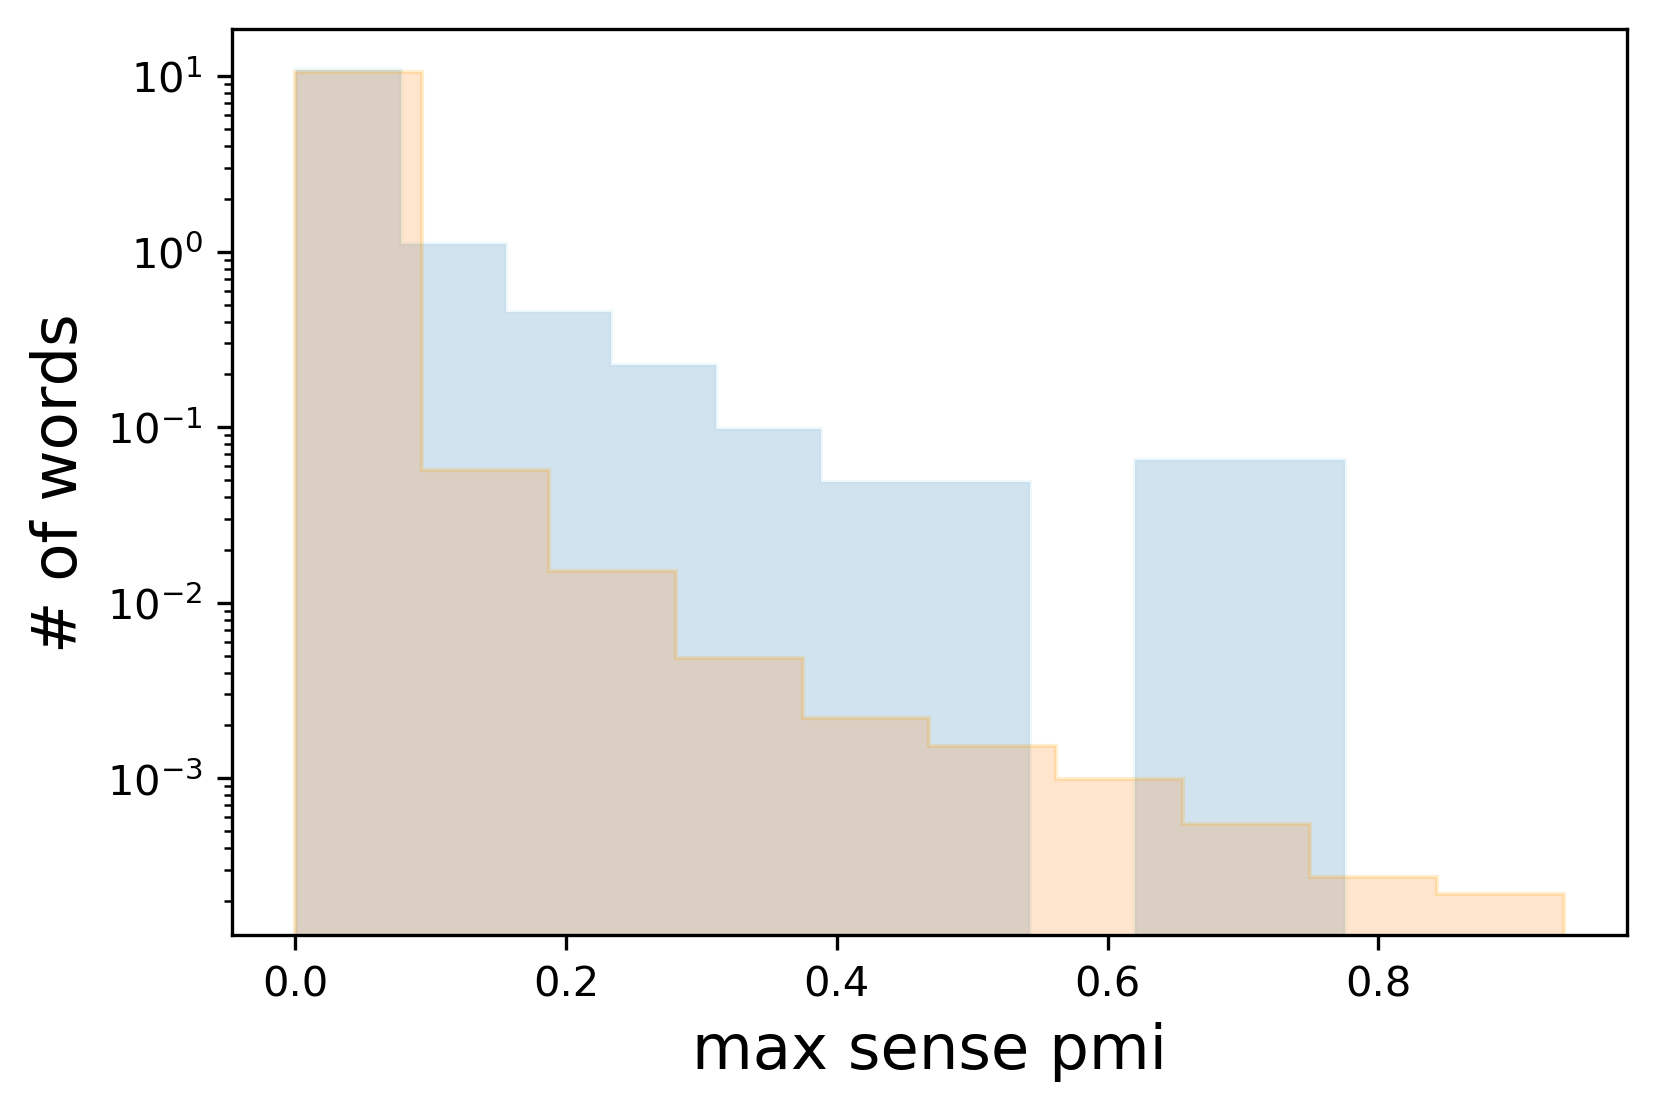

In [213]:
plt.hist(gloss_vals, label="glossary", alpha=0.2, density=True, edgecolor='lightblue', histtype= "stepfilled")
plt.hist(not_gloss_vals, label="non-glossary", alpha=0.2, density=True, edgecolor='orange', histtype= "stepfilled")
plt.yscale('log')
plt.ylabel('# of words', fontsize=15)
plt.xlabel('max sense pmi', fontsize=15)

## Type PMI

In [312]:
gloss_vals = []
not_gloss_vals = []
for filename in tqdm.tqdm(sorted(os.listdir(TYPE_PMI_DIR))): 
    subreddit = filename.replace('_0.2.csv', '')
    if subreddit not in sr2terms: continue
    gloss_terms = set(sr2terms[subreddit])
    with open(TYPE_PMI_DIR + filename, 'r') as infile: 
        w2score = defaultdict(list)
        reader = csv.DictReader(infile)
        for row in reader: 
            w = row['word']
            score = float(row['pmi'])
            if w in gloss_terms: 
                gloss_vals.append(score)
            else: 
                not_gloss_vals.append(score)

100%|██████████| 474/474 [00:02<00:00, 234.14it/s]


In [313]:
print(len(gloss_vals))
print(len(not_gloss_vals))

2138
431596


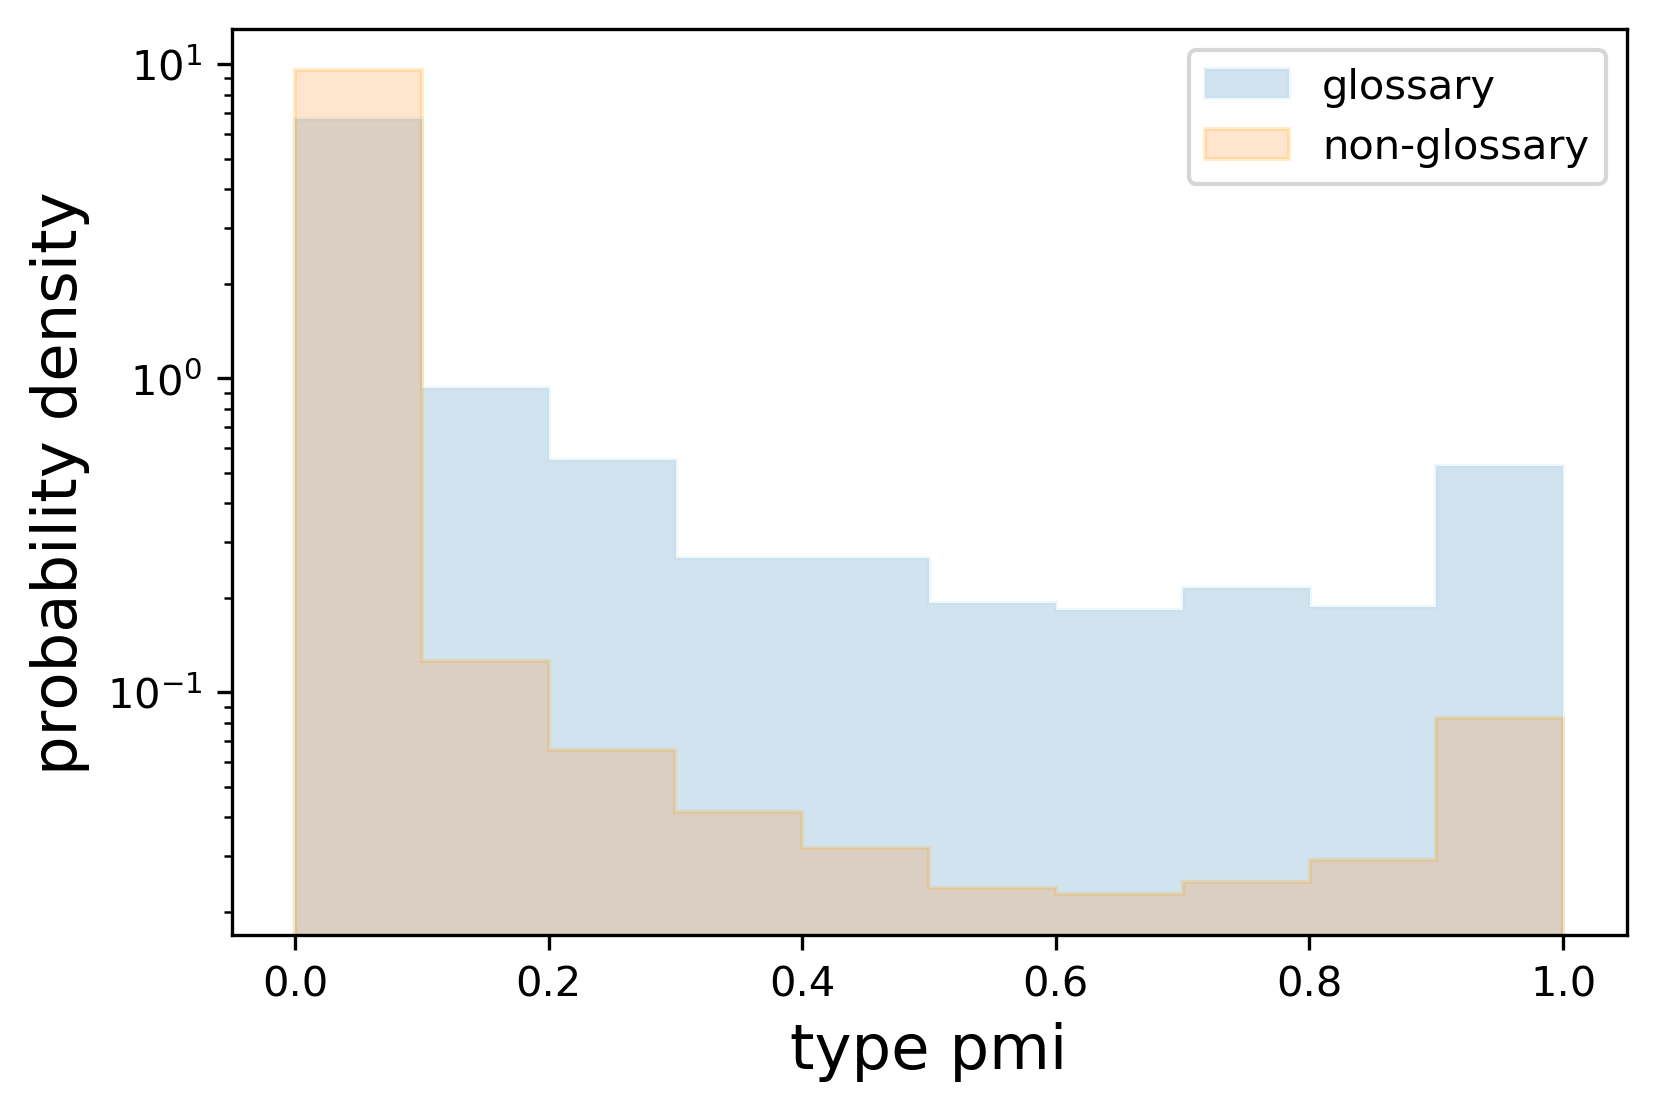

In [215]:
plt.hist(gloss_vals, label="glossary", alpha=0.2, density=True, edgecolor='lightblue', histtype= "stepfilled")
plt.hist(not_gloss_vals, label="non-glossary", alpha=0.2, density=True, edgecolor='orange', histtype= "stepfilled")
plt.yscale('log')
plt.ylabel('probability density', fontsize=15)
plt.xlabel('type pmi', fontsize=15)
plt.legend()

In [216]:
print(ttest_ind(gloss_vals, not_gloss_vals))
print(mannwhitneyu(gloss_vals, not_gloss_vals, alternative='greater'))

Ttest_indResult(statistic=53.63694201629838, pvalue=0.0)
MannwhitneyuResult(statistic=758148323.5, pvalue=0.0)


In [217]:
print(np.median(gloss_vals))
print(np.median(not_gloss_vals))

0.03202189622635
0.002844260649185


In [218]:
gloss_vals = []
not_gloss_vals = []
for filename in tqdm.tqdm(sorted(os.listdir(TYPE_PMI_DIR))): 
    subreddit = filename.replace('_0.2.csv', '')
    if subreddit not in sr2terms: continue
    gloss_terms = set(sr2terms[subreddit])
    with open(TYPE_PMI_DIR + filename, 'r') as infile: 
        w2score = defaultdict(list)
        reader = csv.DictReader(infile)
        for row in reader: 
            w = row['word']
            score = float(row['pmi'])
            if w in gloss_terms and score < 0.05 and int(row['count']) > 100: 
                print(subreddit, w, score)
            #elif w not in gloss_terms and score > 0.85 and int(row['count']) > 100: 
            #    print(subreddit, w, score)

  0%|          | 0/474 [00:00<?, ?it/s]

afl back 0.00161776048425
afl behind 0.00246897537522
afl list 0.00262597710776
afl percentage 0.0045045045045
afl ground 0.00572927368765
afl forward 0.00661241098678
afl ball 0.0116589821151
afl centre 0.0124477292619
afl mark 0.0125471442305
afl goal 0.0129672225417
afl

  6%|▌         | 28/474 [00:00<00:04, 100.94it/s]

 ladder 0.0156382978723
afl finals 0.0207114439504
afl boundary 0.0260454002389
afl disposal 0.0343624161074
airforce asap 0.00590684068407
airforce ad 0.00611761107288
airforce ig 0.0108608848427
airforce sf 0.0232075716323
airforce ts 0.0318418885534
amitheasshole info 0.0163304769347
amitheasshole nah 0.0322916003649
aquariums tbh 0.00140013323849
aquariums imo 0.00156724165469
aquariums ram 0.0058423439135
aquariums led 0.00620248735647
aquariums cycle 0.02084375
aquariums oscar 0.0319096710849
aquariums diy 0.0320366132723
aquariums fry 0.0486425339367
askgaybros sub 0.00186538734374
askgaybros top 0.00304521710092
askgaybros bear 0.00522037930351
askgaybros bottom 0.00807769466846
askgaybros trans 0.0118911423124
askgaybros lgbtq 0.0264115135221
askgaybros lgbt 0.0458958517211
asoiaf subreddit 0.00130363251041
asoiaf op 0.00175380210562
asoiaf lol 0.00241638840961
asoiaf so 0.00386129501203
asoiaf got 0.0043331277177
asoiaf imo 0.00496126816802
asoiaf iirc 0.00581583198708


  8%|▊         | 39/474 [00:00<00:04, 102.31it/s]

bigbrother dr 0.0102048930474
bigbrother comp 0.0346102853953
bodybuilding set 0.00211747011795
bodybuilding pr 0.00907469169317
bodybuilding bf 0.012240127937
bodybuilding rep 0.0188741503333
boxoffice for 0.00112385833771
boxoffice am 0.00115186512707


 14%|█▍        | 68/474 [00:00<00:03, 123.92it/s]

boxoffice foreign 0.00666827347955
boxoffice bomb 0.00993176955065
boxoffice international 0.0124428420682
boxoffice legs 0.0135492482434
boxoffice os 0.0152230543797
boxoffice cm 0.0188657136161
boxoffice eg 0.0234570475396
boxoffice lotr 0.0319908597544
boxoffice overseas 0.0384286934244
boxoffice domestic 0.0415838669316
cars block 0.00518724460284
cars valve 0.0107091172214
cars cam 0.0115494779636
cars gear 0.0130931582224
cars traction 0.0334604715673
cats quick 0.00127766468881
cats catch 0.00243168874384
cats blue 0.00300694514569
cats breed 0.0329133704463
cats stray 0.0485195797517


 19%|█▉        | 89/474 [00:00<00:02, 129.17it/s]

childfree so 0.00306027105971
childfree re 0.00346933036245
childfree spawn 0.00584443489471
childfree accident 0.0065668410608
childfree karen 0.0136072572038
childfree parent 0.0346802690072
christianity conservative 0.00687096774194
christianity angel 0.0115445489247


 22%|██▏       | 103/474 [00:00<00:03, 109.12it/s]

christianity tradition 0.0253201970443
christianity priest 0.0266772844913
christianity confession 0.0303510758777
christianity christ 0.039448014689
churning y 0.00183213240538
churning f 0.00225211135439
churning sub 0.00414063444188
churning pc 0.00567794947548
churning dc 0.00579841964641
churning hp 0.00585608358611
churning j 0.0109043927649
churning af 0.0200326112276
churning bb 0.0207249802994
churning mr 0.0209724895279
churning pp 0.0257498972743
churning rt 0.0283727399166
churning doc 0.0289287203001
churning mo 0.0296693981351
churning dl 0.0313432835821
churning ur 0.0335243828248
churning dd 0.0450063797703
churning cl 0.0460096213149
clashroyale control 0.00141737835368
clashroyale it 0.00170389966638
clashroyale pull 0.00188180077265
clashroyale id 0.00374668934777
clashroyale toxic 0.00376065333007
clashroyale op 0.00405698800336
clashroyale season 0.00452377511201
clashroyale league 0.00466926070039
clashroyale pump 0.00778189794746
clashroyale drag 0.00797117766269

 31%|███       | 145/474 [00:01<00:02, 132.90it/s]

dnd sad 0.00109597369663
dnd mad 0.00304538727786
dnd raw 0.0161800914527
dnd dmg 0.0326688237136
dnd adventure 0.0426623985871
dota2 b 0.00168112134133
dota2 p 0.00197962574958
dota2 back 0.00213947320547
dota2 miss 0.00295745810268
dota2 push 0.00397052062581
dota2 top 0.003991381161
dota2 bot 0.00442634560907
dota2 cs 0.0113357843137
dota2 carry 0.0136513707015
dota2 mid 0.0168290360387
dota2 tp 0.0458035477893
elderscrollsonline hot 0.00113166876235
elderscrollsonline c 0.00128609560786
elderscrollsonline drink 0.00157580532743
elderscrollsonline tell 0.00170090755567
elderscrollsonline war 0.00171526586621
elderscrollsonline op 0.00226092560604
elderscrollsonline so 0.00230918625655
elderscrollsonline food 0.00281009552838
elderscrollsonline pm 0.00282485875706
elderscrollsonline blood 0.00302114803625
elderscrollsonline troll 0.00355439965323
elderscrollsonline ad 0.00415487752033
elderscrollsonline roll 0.00502749695991
elderscrollsonline raid 0.00633646286037
elderscrollsonline

 37%|███▋      | 176/474 [00:01<00:02, 123.21it/s]

fifa if 0.00171966565935
fifa op 0.00322762977871
fifa bin 0.011778158948
fifa draft 0.0118384401114
fifa beast 0.0147183696575
fireemblemheroes r 0.00100027012642
fireemblemheroes is 0.0014663964773
fireemblemheroes g 0.00239487331946
fireemblemheroes b 0.0108994555839
fireemblemheroes cc 0.0127414240415
fireemblemheroes aa 0.0143328700486
fireemblemheroes hm 0.0219490781387
fireemblemheroes gc 0.02309934963
fireemblemheroes sp 0.0231928875145
fireemblemheroes ta 0.0244071317293
fireemblemheroes si 0.0269569725246
fireemblemheroes iv 0.0270164829806
fireemblemheroes f2p 0.0369523809524
fireemblemheroes hp 0.0382119986518
fitness if 0.00355164840502
fitness set 0.00736167181192
fitness 5k 0.0107835264426
fitness plate 0.0126160337553
fitness pr 0.0165981540371
fitness keto 0.0170191339376
fitness tm 0.0175521078201
fitness cutting 0.0220570534425
fitness ppl 0.0301214319508
fitness volume 0.042024920686
fitness rom 0.0479019680654
fitness bw 0.0498120300752
future_fight if 0.0010250198

 43%|████▎     | 203/474 [00:01<00:02, 117.97it/s]

gamingcirclejerk microsoft 0.00687519355838
gamingcirclejerk valve 0.00788712011577
gamingcirclejerk gem 0.0135972805439
gamingcirclejerk ea 0.0256472296153
gamingcirclejerk bethesda 0.0274244833068
gendercritical man 0.00307510554388
gendercritical sex 0.0141877992306
gendercritical woman 0.0151265838644
gendercritical gender 0.0328955354325
hearthstone pain 0.00178518298126
hearthstone out 0.00194571663437
hearthstone block 0.00246300822869
hearthstone reach 0.00262695708303
hearthstone death 0.0030618844507
hearthstone cycle 0.0031875
hearthstone burn 0.00379514468989
hearthstone set 0.00399251959155
hearthstone face 0.00429239505623
hearthstone tech 0.00619799262246
hearthstone shield 0.00810363986232
hearthstone value 0.00875489478208
hearthstone giant 0.00927429795448
hearthstone mountain 0.0100814804585
hearthstone portal 0.0128276014597
hearthstone standard 0.0129118920993
hearthstone classic 0.0139223238645
hearthstone miracle 0.0148164777192
hearthstone drake 0.0151555437384


 57%|█████▋    | 271/474 [00:01<00:01, 161.77it/s]

justnomil jade 0.0307237813885
justnomil dw 0.0307975783101
justnomil ds 0.0360606060606
justnomil lc 0.0482789450156
kpop bias 0.022518263859
leagueoflegends or 0.00319321077434
leagueoflegends top 0.00884941679719
leagueoflegends ad 0.0128979633453
leagueoflegends bot 0.0246610683934
leagueoflegends mid 0.0279629358336
leagueoflegends cc 0.030729316806
me_irl click 0.00267881674146
motorcycles standard 0.00408465376391


 70%|███████   | 334/474 [00:01<00:00, 204.13it/s]

pathofexile adds 0.0096081669419
pathofexile ninja 0.0178908567832
pathofexile dot 0.0184169278997
pathofexile mob 0.0295757346688
pathofexile rt 0.0400556328234
pathofexile dps 0.0475835125763
pathofexile reroll 0.0477777777778
pokemontrades so 0.000860451539799
pokemontrades perfect 0.00238011418426
pokemontrades em 0.00273026247751
pokemontrades legendary 0.00405881724641
pokemontrades event 0.00444052006552
pokemontrades competitive 0.00528854535945
pokemontrades pm 0.00562675118277
pokemontrades hp 0.00585608358611
pokemontrades rng 0.00716957605985
pokemontrades nature 0.010455140607
pokemontrades ha 0.0238181518695
pokemontrades redeem 0.0238674033149
pokemontrades iv 0.0300399882961
pokemontrades ot 0.0475969889983
ps4 btw 0.00180039404851
ps4 imo 0.00456197093116
ps4 na 0.00657559095289
ps4 fps 0.0164279078864
ps4 dlc 0.0266691885758
ps4 rpg 0.0279509559435
ps4 hdmi 0.0400438837082
purplepilldebate so 0.000614750925997
purplepilldebate af 0.00318347697803
purplepilldebate beta

 85%|████████▌ | 403/474 [00:02<00:00, 213.41it/s]

raisedbynarcissists n 0.0133670578065
raisedbynarcissists fog 0.0193851279721
skincareaddiction he 0.000628155265025
skincareaddiction pc 0.00141948736887
skincareaddiction to 0.0029844668634
skincareaddiction de 0.0101627323599
skincareaddiction ha 0.0157140504036
skincareaddiction fa 0.0177855274629
skincareaddiction la 0.0181845193879
skincareaddiction pie 0.0212463149334
skincareaddiction sa 0.0310432569975
skincareaddiction bp 0.0433222591362
starwarsbattlefront soon 0.00204653462627
starwarsbattlefront op 0.00330158528919
starwarsbattlefront cc 0.00582300374748
starwarsbattlefront bf 0.00984130889408
starwarsbattlefront sa 0.013358778626
starwarsbattlefront buff 0.0153987843065
starwarsbattlefront st 0.0162982581237
starwarsbattlefront devs 0.0165701415701
starwarsbattlefront nerf 0.0214404432133
starwarsbattlefront pt 0.0223239839725
starwarsbattlefront bp 0.0232558139535
starwarsbattlefront credits 0.0289994392374
the_donald cuck 0.0459527824621
thedivision hot 0.00090713130950

 97%|█████████▋| 458/474 [00:02<00:00, 233.75it/s]

 add 0.00496155233187
thedivision cc 0.00582300374748
thedivision trash 0.00643948730589
thedivision hp 0.00703572632289
thedivision xp 0.00703664365374
thedivision alt 0.00717528188607
thedivision tank 0.00747104968248
thedivision dlc 0.00771704180064
thedivision named 0.00814521131699
thedivision base 0.00822980316115
thedivision lag 0.00828330420245
thedivision melee 0.00839575687497
thedivision wipe 0.00854653421389
thedivision casual 0.00934552230115
thedivision cd 0.0107207207207
thedivision dc 0.0131317150816
thedivision healer 0.0132340777502
thedivision skills 0.0133919997206
thedivision boss 0.0137150488845
thedivision elite 0.0138022083533
thedivision weapons 0.0146016981234
thedivision boo 0.0146630978704
thedivision survival 0.0147586042065
thedivision lvl 0.0149119114906
thedivision roll 0.0151732399223
thedivision buff 0.015214588322
thedivision perks 0.0160163075131
thedivision farm 0.016149068323
thedivision mod 0.0163525216505
thedivision encounters 0.0164862204724
th

100%|██████████| 474/474 [00:02<00:00, 184.69it/s]

wow s 0.00256200040992
wow m 0.00284686401532
wow if 0.00302750200223
wow n 0.00408215537804
wow ah 0.00446285642215
wow fresh 0.00496904312704
wow trash 0.00511461671186
wow ally 0.0116464264384
wow mc 0.0134919791777
wow cos 0.0142210730446
wow rng 0.0153366583541
wow alt 0.0153389954605
wow npc 0.0163101385132
wow heals 0.0186802523047
wow cd 0.0193693693694
wow wow 0.0219643820831
wow disc 0.0233278658648
wow mob 0.0279693848625
wow bm 0.0288065843621
wow hunter 0.0317985357678
wow pve 0.0360904711358
wow dps 0.0466616917607


## TFIDF

In [219]:
gloss_vals = []
not_gloss_vals = []
for filename in tqdm.tqdm(sorted(os.listdir(TFIDF_DIR))): 
    subreddit = filename.replace('_0.2.csv', '')
    if subreddit not in sr2terms: continue
    gloss_terms = set(sr2terms[subreddit])
    with open(TFIDF_DIR + filename, 'r') as infile: 
        w2score = defaultdict(list)
        reader = csv.DictReader(infile)
        for row in reader: 
            w = row['word']
            score = float(row['tfidf'])
            if w in gloss_terms: 
                gloss_vals.append(score)
            else: 
                not_gloss_vals.append(score)

100%|██████████| 474/474 [00:01<00:00, 245.81it/s]


In [220]:
print(np.median(gloss_vals))
print(np.median(not_gloss_vals))

0.552308985925
0.0235416471239


In [221]:
print(mannwhitneyu(gloss_vals, not_gloss_vals, alternative='greater'))

MannwhitneyuResult(statistic=693868868.0, pvalue=0.0)


## Finetuned vs. BERT-base

In [222]:
SENSE_PMI_DIR = LOG_DIR + 'ft_max_sense_pmi/'
BASE_SENSE_PMI_DIR = LOG_DIR + 'base_max_sense_pmi/'

In [231]:
diff = Counter()
for filename in tqdm.tqdm(sorted(os.listdir(BASE_SENSE_PMI_DIR))):
    subreddit = filename.replace('.csv', '')
    with open(SENSE_PMI_DIR + filename, 'r') as infile: 
        w2score_ft = defaultdict(float)
        reader = csv.DictReader(infile)
        for row in reader: 
            w = row['word']
            score = float(row['max_pmi'])
            w2score_ft[w] = score
    with open(BASE_SENSE_PMI_DIR + filename, 'r') as infile: 
        w2score_base = defaultdict(float)
        reader = csv.DictReader(infile)
        for row in reader: 
            w = row['word']
            score = float(row['max_pmi'])
            w2score_base[w] = score
    for w in sorted(w2score_ft.keys()): 
        diff[(subreddit, w)] = w2score_base[w] - w2score_ft[w]
mc = diff.most_common()
print("BERT-base much higher:", mc[:20])
print("Finetuned much higher:", mc[-20:])
print("Average difference:", np.mean(np.abs(list(diff.values()))), np.var(np.abs(list(diff.values()))))

100%|██████████| 474/474 [00:18<00:00, 26.20it/s]


BERT-base much higher: [(('azurelane', 'cubes'), 0.5929828973843059), (('sekiro', 'hesitation'), 0.4693565965301574), (('themonkeyspaw', 'granted'), 0.4320723519718549), (('borderlands', 'hunters'), 0.4162180641937647), (('loveislandtv', 'island'), 0.40106150959911047), (('sub4sub', 'commented'), 0.3850435624394966), (('boxoffice', 'theaters'), 0.3668784029038113), (('fantasy', 'lynch'), 0.33501189172600904), (('boardgames', 'cubes'), 0.3333333333333333), (('stopdrinking', 'triumph'), 0.320380111997285), (('singapore', 'png'), 0.3013520333625521), (('magicarena', 'drowned'), 0.3004744999368099), (('dauntless', 'blades'), 0.29211574507966254), (('nyyankees', 'er'), 0.2857142857142857), (('hearthstone', 'na'), 0.2814655366657977), (('worldofwarships', 'daring'), 0.28033739281719894), (('hardwareswap', 'replied'), 0.27849335597602554), (('clashofclans', 'stared'), 0.2572332546593961), (('mechmarket', 'replied'), 0.2570790387583798), (('smashbros', 'stocked'), 0.25170068027210885)]
Finetun

## Top 1/2 and 1/4 cutoffs

In [322]:
ROOT = '/data0/lucy/ingroup_lang/'
LOG_DIR = ROOT + 'logs/' 
SENSE_PMI_DIR = LOG_DIR + 'ft_max_sense_pmi/'
BASE_SENSE_PMI_DIR = LOG_DIR + 'base_max_sense_pmi/'
TYPE_PMI_DIR = LOG_DIR + 'pmi/'
TFIDF_DIR = LOG_DIR + 'tfidf/'

In [302]:
def get_medians(path, metric): 
    print(metric)
    vals = []
    for filename in tqdm.tqdm(sorted(os.listdir(path))): 
        subreddit = filename.replace('.csv', '')
        with open(path + filename, 'r') as infile: 
            reader = csv.DictReader(infile)
            for row in reader: 
                w = row['word']
                score = float(row[metric])
                vals.append(score)
    ps = []
    for p in [50, 60, 70, 80, 90, 98, 99]: 
        ps.append(np.percentile(vals, p))
    print(ps)
    return np.percentile(vals, 50), np.percentile(vals, 98)

In [303]:
sense_m, sense_t = get_medians(SENSE_PMI_DIR, 'max_pmi')
#base_m, base_t = get_medians(BASE_SENSE_PMI_DIR, 'max_pmi')
type_m, type_t = get_medians(TYPE_PMI_DIR, 'pmi')
#tfidf_m, tfidf_t = get_medians(TFIDF_DIR, 'tfidf')

  1%|          | 5/474 [00:00<00:09, 49.61it/s]

max_pmi


  0%|          | 0/474 [00:00<?, ?it/s]

[0.0036087605774016924, 0.004476418864908073, 0.005788712011577424, 0.008141112618724558, 0.013975155279503106, 0.043227665706051875, 0.06841158708963413]
pmi


100%|██████████| 474/474 [00:08<00:00, 54.41it/s]


[0.00253788161529, 0.00322909585316, 0.00436090225564, 0.006768908251974008, 0.0161290322581, 0.288888888889, 0.690909090909]


In [290]:
def get_glossary_percentage(cutoff, path, metric): 
    total_count = 0
    recall_count = 0
    recall_set = set()
    for filename in tqdm.tqdm(sorted(os.listdir(path))): 
        subreddit = filename.replace('.csv', '').replace('_0.2', '')
        if subreddit not in sr2terms: continue
        gloss_terms = set(sr2terms[subreddit])
        with open(path + filename, 'r') as infile: 
            reader = csv.DictReader(infile)
            for row in reader: 
                w = row['word'] 
                score = float(row[metric])
                if w in gloss_terms: 
                    if score >= cutoff: 
                        recall_count += 1
                        recall_set.add((subreddit, w))
                    total_count += 1
    return recall_count / total_count, recall_set

In [291]:
percent, sense_set = get_glossary_percentage(sense_t, SENSE_PMI_DIR, 'max_pmi')
print(percent)
percent, _, = get_glossary_percentage(base_t, BASE_SENSE_PMI_DIR, 'max_pmi')
print(percent)
percent, type_set = get_glossary_percentage(type_t, TYPE_PMI_DIR, 'pmi')
print(percent)
percent, _ = get_glossary_percentage(tfidf_t, TFIDF_DIR, 'tfidf')
print(percent)

  5%|▍         | 23/474 [00:00<00:01, 228.51it/s]

0.29234629861982436


  5%|▍         | 23/474 [00:00<00:02, 201.86it/s]

0.2948557089084065


  3%|▎         | 15/474 [00:00<00:03, 125.71it/s]

0.1880261927034612


100%|██████████| 474/474 [00:02<00:00, 214.45it/s]

0.16557530402245088


In [294]:
sense_set & type_set

{('antimlm', 'hun')}

In [295]:
# total possible recall of glossary words
total_count = 0
recall_count = 0
for filename in tqdm.tqdm(sorted(os.listdir(TYPE_PMI_DIR))): 
    subreddit = filename.replace('.csv', '').replace('_0.2', '')
    if subreddit not in sr2terms: continue
    gloss_terms = set(sr2terms[subreddit])
    with open(TYPE_PMI_DIR + filename, 'r') as infile: 
        reader = csv.DictReader(infile)
        for row in reader: 
            w = row['word'] 
            score = float(row['pmi'])
            if w in gloss_terms: 
                recall_count += 1
    total_count += len(gloss_terms)
print(recall_count / total_count)

100%|██████████| 474/474 [00:01<00:00, 247.64it/s]

0.702365308804205


### Mean reciprocal rank

In [337]:
# highest is first
def rank_highest_first(path): 
    inv_ranks = []
    ranks = []
    for filename in tqdm.tqdm(sorted(os.listdir(path))): 
        subreddit = filename.replace('.csv', '')
        if subreddit not in sr2terms: continue
        gloss_terms = set(sr2terms[subreddit])
        with open(path + filename, 'r') as infile: 
            w2score = defaultdict(list)
            reader = csv.DictReader(infile)
            i = 0
            found = False
            for row in reader: 
                i += 1
                w = row['word']
                score = float(row['max_pmi'])
                if w in gloss_terms: 
                    rr = 1/float(i)
                    ranks.append(i)
                    found = True
                    inv_ranks.append(rr)
                    break
            if not found: 
                inv_ranks.append(0)
    print(len(inv_ranks))
    print(np.mean(inv_ranks))
    print(np.mean(ranks))

In [335]:
rank_highest_first(SENSE_PMI_DIR)
rank_highest_first(BASE_SENSE_PMI_DIR)

  5%|▍         | 23/474 [00:00<00:02, 214.12it/s]

57
0.3198379431889933
55.96363636363636


100%|██████████| 474/474 [00:00<00:00, 1061.64it/s]

57
0.3002654668745868
53.163636363636364


In [386]:
# lowest is first
def rank_lowest_first(path, metric): 
    inv_ranks = []
    ranks = []
    for filename in tqdm.tqdm(sorted(os.listdir(path))):
        subreddit = filename.replace('_0.2.csv', '')
        if subreddit not in sr2terms: continue
        gloss_terms = set(sr2terms[subreddit])
        with open(path + filename, 'r') as infile: 
            w2score = defaultdict(list)
            reader = csv.DictReader(infile)
            i = 0
            top = 0
            last_w = ''
            for row in reader: 
                i += 1
                w = row['word']
                score = float(row[metric])
                if w in gloss_terms: 
                    last_w = w
                    top = i
            if top == 0: 
                inv_ranks.append(0)
            rank = i - top + 1
            inv_ranks.append(1/float(rank))
            ranks.append(rank)
    print(len(inv_ranks))
    print(np.mean(inv_ranks))
    print(np.mean(ranks))

In [387]:
rank_lowest_first(TYPE_PMI_DIR, 'pmi')
rank_lowest_first(TFIDF_DIR, 'tfidf')


100%|██████████| 474/474 [00:01<00:00, 349.97it/s]

  6%|▌         | 28/474 [00:00<00:01, 241.75it/s]

57
0.12478490759232998
81.64912280701755



100%|██████████| 474/474 [00:01<00:00, 422.75it/s]

57
0.18687074579740115
69.57894736842105
